In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [193]:
Patm = 101325.0
V0 = 0.008
P0 = 500000
gamma = 1.4
A = 0.0004
rho = 1000

In [194]:
u0 = np.sqrt(2 * (P0 - Patm) / rho)
u0

28.237386564623858

In [195]:
def f(u, t):
    return -gamma*P0*(V0**gamma)*A/rho*((1/2*rho*u**2+Patm)/(P0*V0**gamma))**((gamma+1)/gamma)

In [248]:
ti = 0
tf = 5
t = np.arange(ti, tf, 0.01)
u = odeint(f, u0, t)

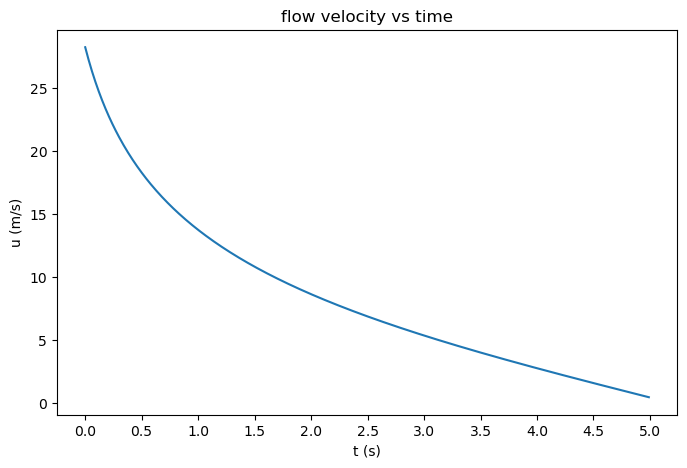

In [233]:
plt.figure(figsize=(8, 5))
plt.title("flow velocity vs time")
plt.plot(t, u)
plt.xlabel("t (s)")
plt.ylabel("u (m/s)")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.yticks(np.arange(0, 30, 5))
plt.show()

In [214]:
from scipy.optimize import curve_fit

In [230]:
def model(t, k, a, b, m):
    return (u0*np.exp(-k*t) + u0 / (1 + np.power(t/a, b))) / 2 - m * np.log(1 + t)

In [231]:
coeffs, _ = curve_fit(model, t, u[:,0])

C:\Users\17024\AppData\Local\Temp\ipykernel_16412\2940829511.py:2: RuntimeWarning: divide by zero encountered in power
  return (u0*np.exp(-k*t) + u0 / (1 + np.power(t/a, b))) / 2 - m * np.log(1 + t)


In [234]:
coeffs

array([0.10260143, 0.47770335, 1.01685527, 5.03910315])

In [245]:
def u_approx(t):
    return 14.12 * (np.exp(-0.1 * t) + 1 / (1 + 2 * t)) - 5 * np.log(1 + t)

In [246]:
fit = [u_approx(i) for i in t]

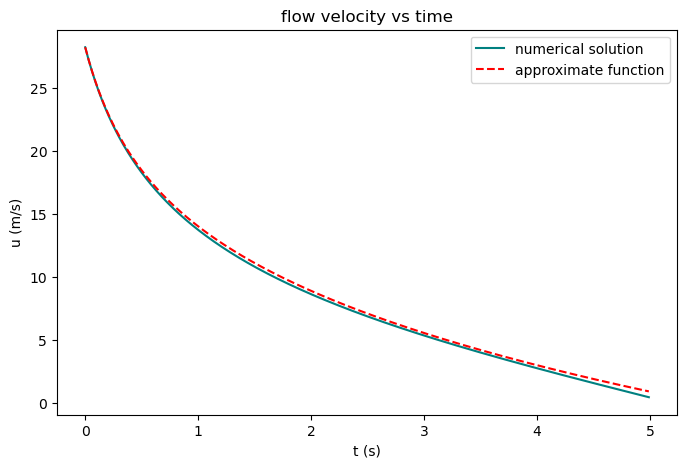

In [249]:
plt.figure(figsize=(8, 5))
plt.plot(t, u, color="teal", label='numerical solution')
# plt.plot(t, model(t, *coeffs), 'r--', label='function fit')
plt.plot(t, fit, 'r--', label='approximate function')
plt.title("flow velocity vs time")
plt.xlabel("t (s)")
plt.ylabel("u (m/s)")
plt.legend(loc='best')


In [240]:
def m(t):
    return 28.24 * (-20 * np.exp(-0.1 * t) - np.log(1 + 2 * t)) + 20 * (1+t) * np.log(1+t) + 575

In [305]:
def f(v, t):
    return 4 * u_approx(t) * u_approx(t) - 10 * m(t)

In [306]:
ti = 0
tf = 5
t = np.arange(ti, tf, 0.01)
v = odeint(f, 0, t)

In [307]:
def model_v(t, a, b, c):
    return -a * (t + b) * (t + b) + c

In [308]:
coeffs_v, _ = curve_fit(model_v, t, v[:,0], maxfev=100000)

(0.0, 3.0)

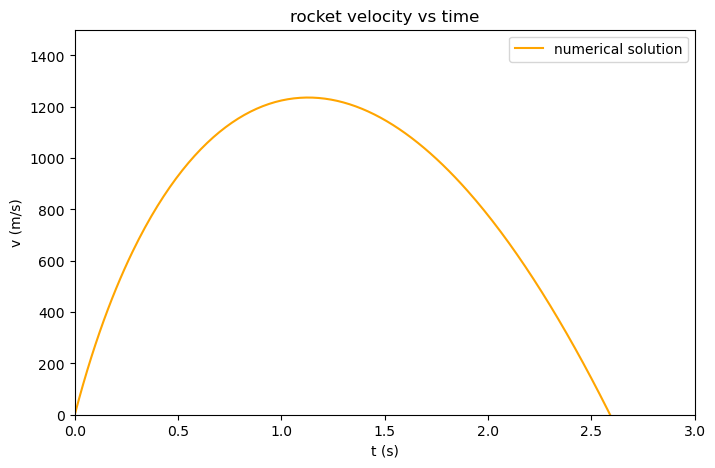

In [310]:
plt.figure(figsize=(8, 5))
plt.plot(t, v, color="orange", label='numerical solution')
# plt.plot(t, model_v(t, *coeffs_v), 'r--', label='function fit')
plt.legend(loc='best')
plt.title("rocket velocity vs time")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.ylim(0, 1500)
plt.xlim(0, 3)

In [311]:
max(v[:,0])

1235.7737576165832